In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
#DATA PREPARATION

In [3]:
# 1.Importing data

In [4]:
df = pd.read_csv('data_retail (1).csv', sep=';')
df.head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,1466304274396,1538718482608,1467681,22
1,2,2,29531,Sepatu,1406077331494,1545735761270,1269337,41
2,3,3,141526,Tas,1493349147000,1548322802000,310915,30
3,4,4,141526,Jaket,1493362372547,1547643603911,722632,27
4,5,5,37545,Sepatu,1429178498531,1542891221530,1775036,25


In [5]:
df.columns

Index(['no', 'Row_Num', 'Customer_ID', 'Product', 'First_Transaction',
       'Last_Transaction', 'Average_Transaction_Amount', 'Count_Transaction'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no                          100000 non-null  int64 
 1   Row_Num                     100000 non-null  int64 
 2   Customer_ID                 100000 non-null  int64 
 3   Product                     100000 non-null  object
 4   First_Transaction           100000 non-null  int64 
 5   Last_Transaction            100000 non-null  int64 
 6   Average_Transaction_Amount  100000 non-null  int64 
 7   Count_Transaction           100000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 6.1+ MB


In [7]:
# 2.Cleansing data

In [8]:
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')

In [9]:
df.head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22
1,2,2,29531,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41
2,3,3,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30
3,4,4,141526,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27
4,5,5,37545,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   no                          100000 non-null  int64         
 1   Row_Num                     100000 non-null  int64         
 2   Customer_ID                 100000 non-null  int64         
 3   Product                     100000 non-null  object        
 4   First_Transaction           100000 non-null  datetime64[ns]
 5   Last_Transaction            100000 non-null  datetime64[ns]
 6   Average_Transaction_Amount  100000 non-null  int64         
 7   Count_Transaction           100000 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(1)
memory usage: 6.1+ MB


In [11]:
#Churn customers untuk melihat 
#persentase pelanggan yang berhenti menggunakan produk dan 
#layanan bisnis selama jangka waktu tertentu

In [12]:
#pengecekan transaksi terakhir pada dataset
print(max(df['Last_Transaction']))

2019-02-01 23:57:57.286000128


In [13]:
#klasifikasi customer yang berstatus churn atau tidak dengan boolean
df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True
df.loc[df['Last_Transaction'] > '2018-08-01', 'is_churn'] = False

In [14]:
df.head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn
0,1,1,29531,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22,False
1,2,2,29531,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41,False
2,3,3,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False
3,4,4,141526,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27,False
4,5,5,37545,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25,False


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   no                          100000 non-null  int64         
 1   Row_Num                     100000 non-null  int64         
 2   Customer_ID                 100000 non-null  int64         
 3   Product                     100000 non-null  object        
 4   First_Transaction           100000 non-null  datetime64[ns]
 5   Last_Transaction            100000 non-null  datetime64[ns]
 6   Average_Transaction_Amount  100000 non-null  int64         
 7   Count_Transaction           100000 non-null  int64         
 8   is_churn                    100000 non-null  object        
dtypes: datetime64[ns](2), int64(5), object(2)
memory usage: 6.9+ MB


In [16]:
df.describe()

,no,Row_Num,Customer_ID,Average_Transaction_Amount,Count_Transaction
count,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000
mean,50000.500000,50000.500000,193083.996940,1.373157e+06,11.698500
std,28867.657797,28867.657797,200747.292955,1.544435e+06,35.417324
min,1.000000,1.000000,654.000000,0.000000e+00,1.000000
25%,25000.750000,25000.750000,60994.500000,4.783038e+05,1.000000
50%,50000.500000,50000.500000,121441.000000,9.059370e+05,2.000000
75%,75000.250000,75000.250000,196023.000000,1.636372e+06,6.000000
max,100000.000000,100000.000000,846213.000000,4.881014e+07,3852.000000


In [17]:
df.corr()

,no,Row_Num,Customer_ID,Average_Transaction_Amount,Count_Transaction
no,1.000000,1.000000,0.187014,-0.002210,-0.370358
Row_Num,1.000000,1.000000,0.187014,-0.002210,-0.370358
Customer_ID,0.187014,0.187014,1.000000,-0.006069,-0.158872
Average_Transaction_Amount,-0.002210,-0.002210,-0.006069,1.000000,0.006222
Count_Transaction,-0.370358,-0.370358,-0.158872,0.006222,1.000000


In [18]:
#DATA PREPROCESSING

In [19]:
#Mengubah value kolom is_churn menjadi numerik menggunakan Label Encoder
LE = LabelEncoder()
df['is_churn'] = LE.fit_transform(df['is_churn'])
print(LE.classes_)
print(np.sort(df['is_churn'].unique()))
print('')

[False True]
[0 1]



In [20]:
df['is_churn']

0        0
1        0
2        0
3        0
4        0
        ..
99995    1
99996    1
99997    1
99998    1
99999    0
Name: is_churn, Length: 100000, dtype: int32

In [21]:
del df['no']
del df['Row_Num']
df.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn
0,29531,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22,0
1,29531,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41,0
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,0
3,141526,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27,0
4,37545,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25,0


In [22]:
#DATA VISUALIZATION DAN Exploratory Data Analysis (EDA)

In [23]:
df.isnull().values.any()

False

In [24]:
df[df.duplicated(keep=False)]

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn
167,34090,Sepatu,2014-12-31 04:56:13.216999936,2019-02-01 00:48:59.935000064,3011127,137,0
168,34090,Sepatu,2014-12-31 04:56:13.216999936,2019-02-01 00:48:59.935000064,3011127,137,0
427,34692,Sepatu,2014-11-24 01:45:26.952000000,2018-03-03 03:43:33.259000064,2957840,37,1
428,34692,Sepatu,2014-11-24 01:45:26.952000000,2018-03-03 03:43:33.259000064,2957840,37,1
483,29442,Jaket,2015-03-14 06:55:14.636000000,2018-12-26 07:12:31.609999872,2152781,28,0
...,...,...,...,...,...,...,...
18543,120883,Sepatu,2017-03-20 10:26:43.156000000,2019-01-05 22:47:59.861999872,1346994,60,0
19006,51496,Sepatu,2015-08-04 06:13:33.253999872,2018-11-12 09:03:15.737999872,1080128,36,0
19007,51496,Sepatu,2015-08-04 06:13:33.253999872,2018-11-12 09:03:15.737999872,1080128,36,0
19306,95797,Sepatu,2016-12-06 03:01:54.101999872,2018-12-04 10:08:51.852999936,2780006,23,0


In [25]:
df.duplicated().value_counts()

False    99931
True        69
dtype: int64

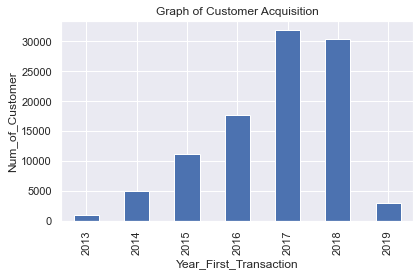

In [26]:
# membuat kolom year first transaction
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
# membuat kolom of year last transaction
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year

df_year = df.groupby(['Year_First_Transaction'])['Customer_ID'].count()
df_year.plot(x='Year_First_Transaction', y='Customer_ID', kind='bar', title='Graph of Customer Acquisition')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

In [27]:
#Transaction by year

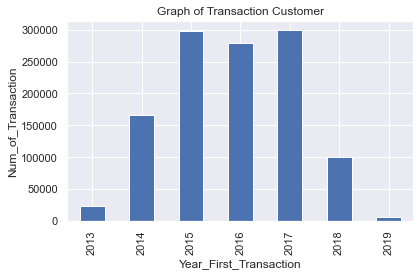

In [28]:
import matplotlib.pyplot as plt

plt.clf()
df_year = df.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
df_year.plot(x='Year_First_Transaction',y='Count_Transaction',kind='bar',title='Graph of Transaction Customer')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Transaction')
plt.tight_layout()
plt.show()

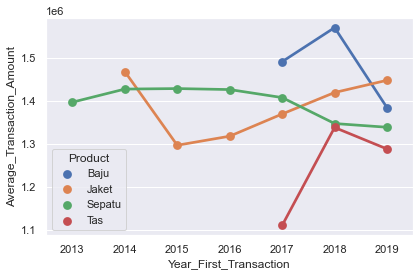

In [29]:
#Average transaction amount by year
plt.clf()
sns.pointplot(data = df.groupby(['Product', 'Year_First_Transaction']).mean().reset_index(), 
              x='Year_First_Transaction', 
              y='Average_Transaction_Amount', 
              hue='Product')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

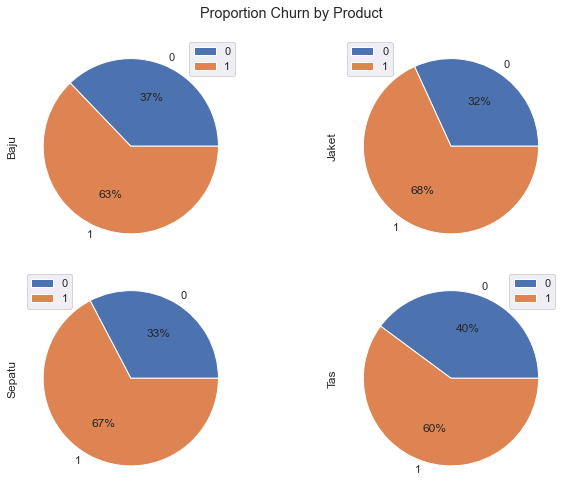

In [30]:
plt.clf()

#melakukan pivot data
df_piv = df.pivot_table(index='is_churn', 
                        columns='Product', 
                        values='Customer_ID', 
                        aggfunc='count', 
                        fill_value=0)

#mendapatkan proportion churn by product
plot_product = df_piv.count().sort_values(ascending=False).head(5).index

#plot pie chartnya
df_piv = df_piv.reindex(columns=plot_product)
df_piv.plot.pie(subplots=True, 
                figsize=(10,7), 
                layout=(-1,2), 
                autopct='%1.0f%%', 
                title='Proportion Churn by Product')
plt.tight_layout()
plt.show()

In [31]:
#PREPROCESSING DATA

In [32]:
df.columns

Index(['Customer_ID', 'Product', 'First_Transaction', 'Last_Transaction',
       'Average_Transaction_Amount', 'Count_Transaction', 'is_churn',
       'Year_First_Transaction', 'Year_Last_Transaction'],
      dtype='object')

In [33]:
#MODELLING

In [34]:
# Feature column : Year_Diff
df['Year_Diff'] = df['Year_Last_Transaction'] - df['Year_First_Transaction']

# Name of feature columns
feature_columns = ['Average_Transaction_Amount','Count_Transaction','Year_Diff']

# Features variable
x = df[feature_columns]

# Target variable
y = df['is_churn']

print('Feature Columns\n', x)
print('\nTarget Column\n', y)

Feature Columns
        Average_Transaction_Amount  Count_Transaction  Year_Diff
0                         1467681                 22          2
1                         1269337                 41          4
2                          310915                 30          2
3                          722632                 27          2
4                         1775036                 25          3
...                           ...                ...        ...
99995                      298662                  1          0
99996                      349556                  1          0
99997                      598013                  1          0
99998                     1208591                  1          0
99999                      486710                  1          0

[100000 rows x 3 columns]

Target Column
 0        0
1        0
2        0
3        0
4        0
        ..
99995    1
99996    1
99997    1
99998    1
99999    0
Name: is_churn, Length: 100000, dtype: int32


In [35]:
# Split x and y into training and testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [36]:
# Train, Predict and Evaluate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Inisiasi model logreg
logreg = LogisticRegression()

# fit the model with data
logreg.fit(x_train, y_train)

# Predict model
y_pred = logreg.predict(x_test)

# Evaluate model using confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[    1  8330]
 [    3 16666]]


<Figure size 432x288 with 0 Axes>

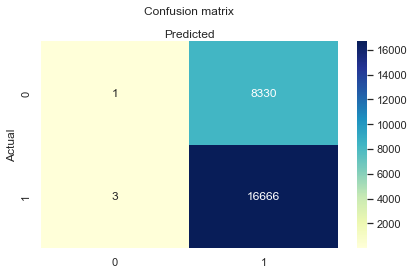

In [37]:
# Visualization of Confusion Matrix

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.clf()
# name of classes
class_names = [0, 1]
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision :', precision_score(y_test, y_pred, average='micro'))
print('Recall :', recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.66668
Precision : 0.66668
Recall : 0.66668
